### Importing Dependencies

In [159]:
# Importing dependecies:
import re
import sys
import string
import pandas as pd
import numpy as np
import nltk

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()

# Word2Vec
from gensim.models import Word2Vec 

# SKLearn
from sklearn.decomposition import PCA

# Configuring Notebook environment:
# Set custom preferences for displaying and visualizing data
# sns.set_style('white')
pd.set_option('max_colwidth', 120)
pd.set_option('max_columns', 200)
pd.set_option('precision', 2)
plt.rcParams["figure.figsize"] = (10, 7.5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

%matplotlib inline

In [160]:
df = pd.read_csv('data/strings/df_clean.csv', index_col=0)
df.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,12 celery finely chop 1 green pepper finely chop 12 finely green onion 14 chop parsley 1 crabmeat 1 14 coarsely crus...,toss ingredient lightly spoon butter bake dish top additional crush cracker crumb brush melt butter bake preheat 350...,"['12', 'celery', 'finely', 'chop', '1', 'green', 'pepper', 'finely', 'chop', '12', 'finely', 'green', 'onion', '14',...","['toss', 'ingredient', 'lightly', 'spoon', 'butter', 'bake', 'dish', 'top', 'additional', 'crush', 'cracker', 'crumb..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,2 skirt steak cut 12inch dice kosher salt fresh crack black pepper 4 6 thickcut applewood smoke bacon 14inch dice 1 ...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enamel cast iron mediumhigh heat render...,"['2', 'skirt', 'steak', 'cut', '12inch', 'dice', 'kosher', 'salt', 'fresh', 'crack', 'black', 'pepper', '4', '6', 't...","['watch', 'make', 'recipe', 'sprinkle', 'steak', 'salt', 'pepper', 'set', 'aside', 'dutch', 'oven', 'preferably', 'e..."
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,1 12 dry black bean pick rinse 8 water plus 14 2 cleave garlic 3 vegetable oil 1 green bell pepper finely chop reser...,saucepan let bean soak enough cold water cover 1 hour drain return bean pan 8 water garlic bring water boil lower he...,"['1', '12', 'dry', 'black', 'bean', 'pick', 'rinse', '8', 'water', 'plus', '14', '2', 'cleave', 'garlic', '3', 'vege...","['saucepan', 'let', 'bean', 'soak', 'enough', 'cold', 'water', 'cover', '1', 'hour', 'drain', 'return', 'bean', 'pan..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,1 14 grind chuck one 15ounce tomato sauce 12 salt freshly grind black pepper 8 egg noodle 12 sour cream 1 14 curd co...,watch make recipe preheat oven 350 degree f brown grind chuck skillet drain fat add tomato sauce 12 salt plenty fres...,"['1', '14', 'grind', 'chuck', 'one', '15ounce', 'tomato', 'sauce', '12', 'salt', 'freshly', 'grind', 'black', 'peppe...","['watch', 'make', 'recipe', 'preheat', 'oven', '350', 'degree', 'f', 'brown', 'grind', 'chuck', 'skillet', 'drain', ..."
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,1 rice brown mediumgrain cook 12cup quinoa 23cup sweet red pepper raw 4 white tuna water drain solid 2 tb seaweed ke...,special equipment sushi mat cook brown rice quinoa 3 water 3540 min bring boil 2 minute reduce heat stir cook remove...,"['1', 'rice', 'brown', 'mediumgrain', 'cook', '12cup', 'quinoa', '23cup', 'sweet', 'red', 'pepper', 'raw', '4', 'whi...","['special', 'equipment', 'sushi', 'mat', 'cook', 'brown', 'rice', 'quinoa', '3', 'water', '3540', 'min', 'bring', 'b..."


### Analyzing Recipes

#### Titles:

In [161]:
top_recipes = df['title'].value_counts()[:10]
top_recipes

Guacamole               34
Tiramisu                23
Fried Chicken           22
Pecan Pie               21
Pastry Dough            21
Caesar Salad            19
Strawberry Shortcake    18
Chocolate Fondue        18
Gazpacho                18
Macaroni and Cheese     17
Name: title, dtype: int64

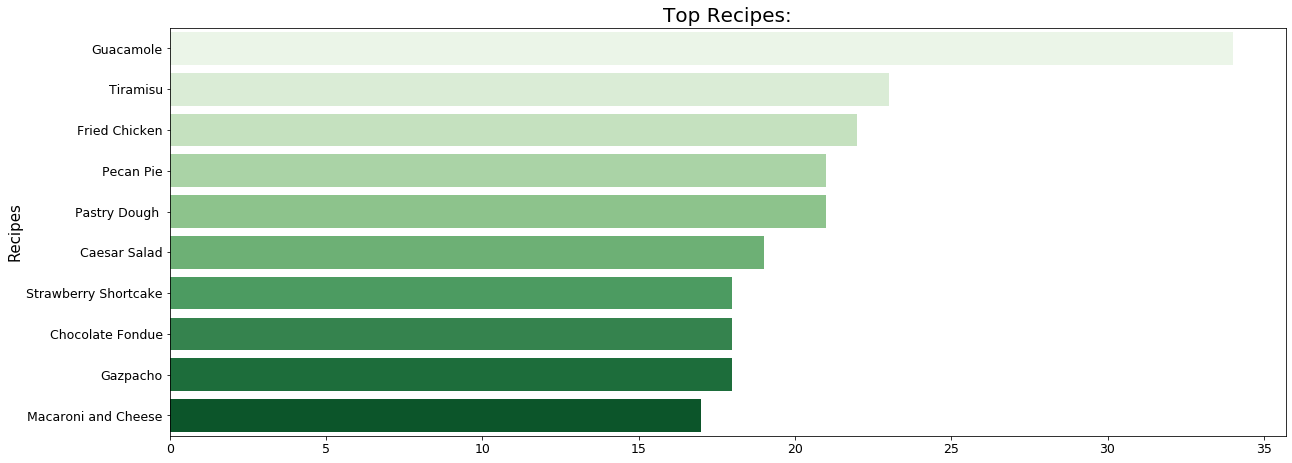

In [162]:
plt.figure(figsize=(20, 7.5))
sns.barplot(x=top_recipes, y=top_recipes.index, palette='Greens')
plt.title('Top Recipes:', size=20)
plt.xlabel('', size=15)
plt.ylabel('Recipes', size=15)
plt.xticks(size=12.5)
plt.yticks(size=12.5)

plt.savefig('graphs/top_recipes.png')
plt.show()

In [163]:
model = Word2Vec(df['title'], min_count=1)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

//anaconda3/envs/Springboard/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


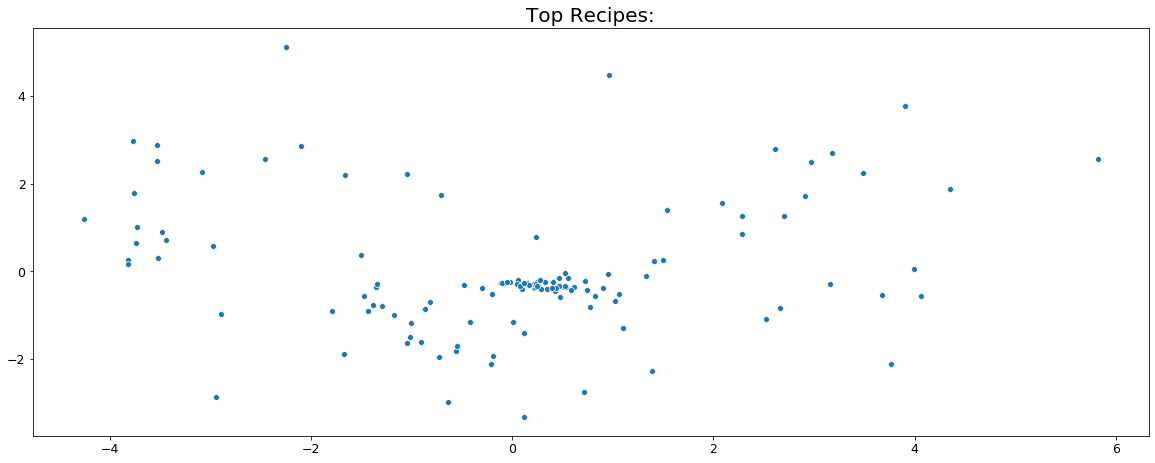

In [164]:
plt.figure(figsize=(20, 7.5))
sns.scatterplot(result[:, 0], result[:, 1], sizes=(20, 200))
plt.title('Top Recipes:', size=20)
plt.xlabel('', size=15)
plt.ylabel('', size=15)
plt.xticks(size=12.5)
plt.yticks(size=12.5)

plt.savefig('graphs/top_recipes_pca.png')
plt.show()

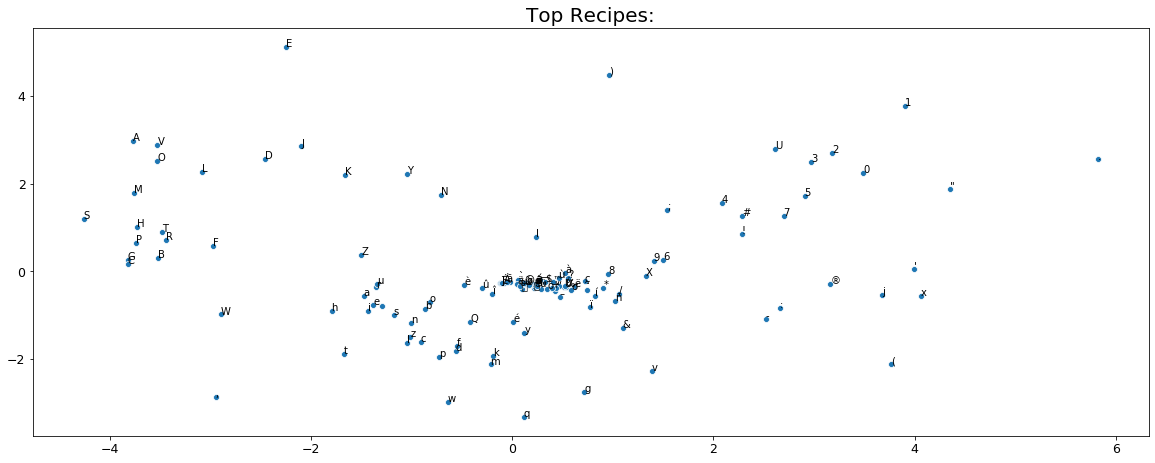

In [166]:
plt.figure(figsize=(20, 7.5))
sns.scatterplot(result[:, 0], result[:, 1], sizes=(150, 200))
plt.title('Top Recipes:', size=20)
plt.xlabel('', size=15)
plt.ylabel('', size=15)
plt.xticks(size=12.5)
plt.yticks(size=12.5)

words = list(model.wv.vocab)

for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

#### Ingredients:

In [167]:
model = Word2Vec(df['ingredients_vector'], min_count=1)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

//anaconda3/envs/Springboard/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


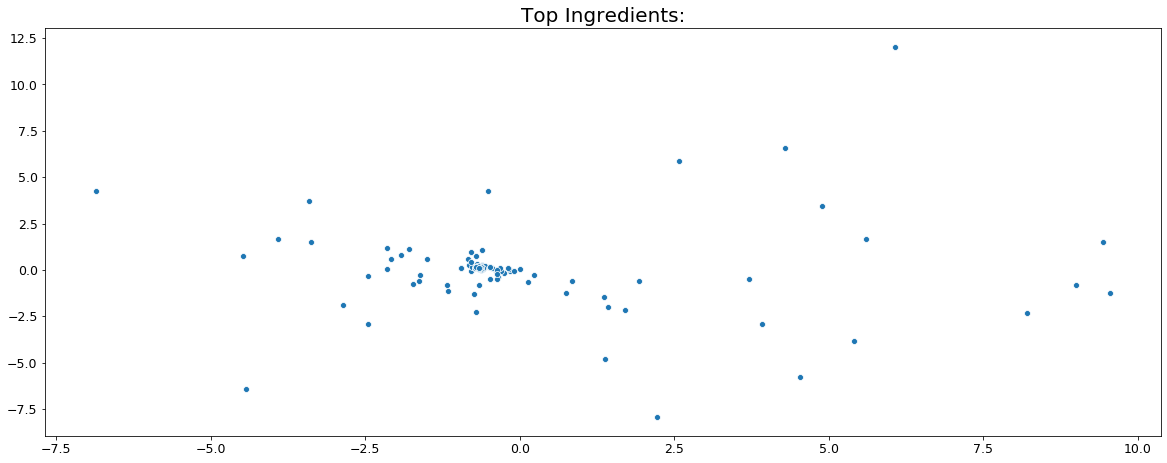

In [168]:
plt.figure(figsize=(20, 7.5))
sns.scatterplot(result[:, 0], result[:, 1], sizes=(20, 200))
plt.title('Top Ingredients:', size=20)
plt.xlabel('', size=15)
plt.ylabel('', size=15)
plt.xticks(size=12.5)
plt.yticks(size=12.5)

plt.savefig('graphs/top_ingredients_pca.png')
plt.show()